In [1]:
import pyodbc
import pandas as pd
import numpy as np 
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
## 라이브러리 불러오기
'''메인 라이브러리'''
import numpy as np
import pandas as pd
import os, time, re
import pickle, gzip

'''시각화 관련 라이브러리'''
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

%matplotlib inline

'''데이터 준비 및 모델 평가 관련 라이브러리'''
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

'''알고리즘 관련 라이브러리'''
import lightgbm as lgb

'''텐서플로 및 케라스 관련 라이브러리'''
import tensorflow as tf
import keras
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Activation, Dense, Dropout
from keras.layers import BatchNormalization, Input, Lambda
from keras import regularizers
from keras.losses import mse, binary_crossentropy

from collections import Counter
import numpy as np
import seaborn as sns
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from collections import Counter

import tensorflow as tf
import tensorflow.keras.layers as layers
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('C://Users/USER/20210906/credit_card/creditcard.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [3]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test,y_train, y_test= train_test_split(X, y,train_size=0.7, 
                                                    test_size=0.3, random_state=121)

In [4]:
fraud = df[df['Class'] == 1].copy()
normal = df[df['Class'] == 0].copy()
fraud.shape, normal.shape

total = len(fraud) + len(normal)

print(f"Total = {total:,}")
print(f"normal = {len(normal):,}")
print(f"fraud = {len(fraud):,}")
print(f"Fraud = {len(fraud)/total*100:,.2f}%")
print(f"Normal = {len(normal)/total*100:,.2f}%")

outlier_fraction = len(fraud)/float(len(normal))
outlier_fraction

Total = 284,807
normal = 284,315
fraud = 492
Fraud = 0.17%
Normal = 99.83%


0.0017304750013189597

<AxesSubplot:xlabel='Class', ylabel='count'>

findfont: Font family ['NanumBarunGothicBold'] not found. Falling back to DejaVu Sans.


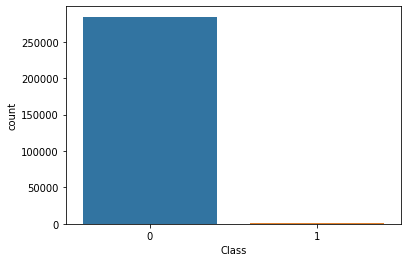

In [5]:
sns.countplot(x=y)

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, \
                            recall_score, confusion_matrix, classification_report

# 수정된 get_clf_eval() 함수 
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [7]:
rf_clf1 = RandomForestClassifier(n_estimators=100, max_depth=8, min_samples_leaf=8, \
                                 min_samples_split=8, random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.9994


In [17]:
df.rename(columns={'V26':'한글출력테스트'},inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Time     284807 non-null  float64
 1   V1       284807 non-null  float64
 2   V2       284807 non-null  float64
 3   V3       284807 non-null  float64
 4   V4       284807 non-null  float64
 5   V5       284807 non-null  float64
 6   V6       284807 non-null  float64
 7   V7       284807 non-null  float64
 8   V8       284807 non-null  float64
 9   V9       284807 non-null  float64
 10  V10      284807 non-null  float64
 11  V11      284807 non-null  float64
 12  V12      284807 non-null  float64
 13  V13      284807 non-null  float64
 14  V14      284807 non-null  float64
 15  V15      284807 non-null  float64
 16  V16      284807 non-null  float64
 17  V17      284807 non-null  float64
 18  V18      284807 non-null  float64
 19  V19      284807 non-null  float64
 20  V20      284807 non-null  

findfont: Font family ['NirmalaB'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NirmalaB'] not found. Falling back to DejaVu Sans.


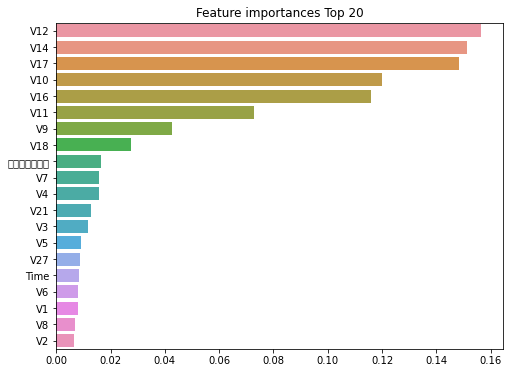

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=df.iloc[:, :-1].columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

In [22]:
import matplotlib.font_manager as fm
# 사용 가능한 폰트 리스트
font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')

font_list[:]

['C:\\Windows\\Fonts\\PERTIBD.TTF',
 'C:\\WINDOWS\\Fonts\\NirmalaB.ttf',
 'C:\\WINDOWS\\Fonts\\comic.ttf',
 'C:\\Windows\\Fonts\\BOD_I.TTF',
 'C:\\Windows\\Fonts\\PERI____.TTF',
 'C:\\Windows\\Fonts\\CALISTI.TTF',
 'C:\\WINDOWS\\Fonts\\HYBDAM.TTF',
 'C:\\WINDOWS\\Fonts\\timesi.ttf',
 'C:\\WINDOWS\\Fonts\\ENGARMBI.TTF',
 'C:\\WINDOWS\\Fonts\\GLSNECB.TTF',
 'C:\\Windows\\Fonts\\verdanaz.ttf',
 'C:\\WINDOWS\\Fonts\\segoeuil.ttf',
 'C:\\WINDOWS\\Fonts\\COOPBL.TTF',
 'C:\\WINDOWS\\Fonts\\HANYheadL.ttf',
 'C:\\Windows\\Fonts\\TCBI____.TTF',
 'C:\\Windows\\Fonts\\PERBI___.TTF',
 'C:\\Windows\\Fonts\\ARIALN.TTF',
 'C:\\Windows\\Fonts\\BOD_BLAI.TTF',
 'C:\\WINDOWS\\Fonts\\ARIALUNI.TTF',
 'C:\\WINDOWS\\Fonts\\ahn_l.ttf',
 'C:\\WINDOWS\\Fonts\\seguisym.ttf',
 'C:\\Windows\\Fonts\\FORTE.TTF',
 'C:\\Windows\\Fonts\\ARIALNBI.TTF',
 'C:\\WINDOWS\\Fonts\\comicbd.ttf',
 'C:\\WINDOWS\\Fonts\\HYMJRE.TTF',
 'C:\\Windows\\Fonts\\LSANSDI.TTF',
 'C:\\Windows\\Fonts\\FTLTLT.TTF',
 'C:\\WINDOWS\\Fonts\\segoeui

In [23]:
import os

plt.rc("font", family="Malgun Gothic")

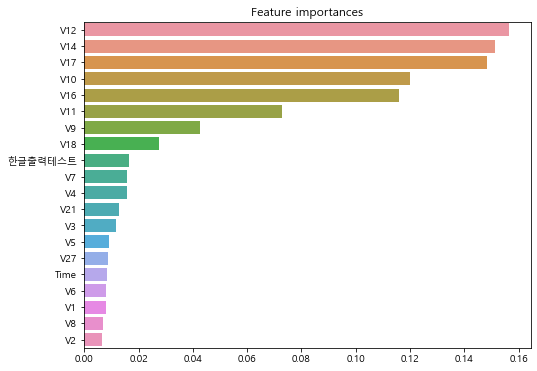

In [24]:
plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()